<a href="https://colab.research.google.com/github/asachkahitari/Car-features-and-MSRP/blob/master/Internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing the required libraries for Analysis.**

In [41]:
#Importing libraries required for processing data and working on it.
import pandas as panda
import numpy as npy
import seaborn as sean
import matplotlib.pyplot as matplot
%matplotlib inline
sean.set(color_codes=True)
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression

#  **1.2 Importing required file and reading data.**

In [23]:
#Reading the data from uploaded file.
var = pd.read_csv('data.csv', encoding = "ISO-8859-1")


In [24]:
#To display the data present inside the file.
var

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [25]:
#Output of the first 5 entries present in the file.
var.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [26]:
#Output of the last 5 entries present in the file.
var.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# **1.3 Checking datatypes and statistical summary.**

In [27]:
#Checking datatypes
var.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [28]:
#Detail description of various properties of the data.
var.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [29]:
#Shape of the data(Columns and rows).
var.shape

(11914, 16)

In [30]:
#To check the null values present.
var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [31]:
#Calculating the number null values present inside each column.
nullValues=var.isnull().sum()
nullValues

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# **2. Dropping Irrelevant columns from the data set**

We can remove few of the columns to make the things easier. As we can see that Number of doors aren't gonna affect the price estimation of cars so we can remove them from the dataset. The same reason applies to Engine fuel type as well. From the above output we can clearly see that there are maximum number of null values in the 'Market Category' column. Thus, for the ease of things we opt to remove it from the labelled columns.

In [32]:
#Dropping irrelevant columns from the dataset
var = var.drop(['Number of Doors', 'Engine Fuel Type','Market Category'], axis=1)
var

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


# **3. Renaming the column names to remove the unnecessary confusion**

It improves the readability of the dataset which makes the data look better and compact.

In [33]:
var = var.rename(columns={"Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Engine HP": "HP", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
var.head(5)


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **4. Dropping the duplicate rows and dealing with the null values**

# 4.1 Dropping duplicate values.

In a large dataset the duplicate data is found very frequently. So, here we will try to fing the duplicate data and will drop them if necessary.

In [34]:
#Finding dimensions of dataset i.e column and rows
var.shape

(11914, 13)

In [35]:
#Dropping out duplicate values.
var=var.drop_duplicates()
var

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


From the above output we can see that the number of rows have been dropped down to 11122. That means duplicate entries are removed.

In [36]:
#Dimension of data set after removing duplicate values.
var.shape

(11122, 13)

# 4.2 Dropping null values

If we check the dataset clearly we can find that there are many null values present in the dataset. Either we can rplace those null values with mean, most frequent number etc. or we can simply drop them. As the number of null values is less in the given dataset we can drop them.

In [37]:
# Printing number of NULL values present in each column.
print(var.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [38]:
#Dropping all the NULL values.
var=var.dropna()
var.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [39]:
# Checking if the NULL values are removed or not.
print(var.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# **5. Dealing with Outliers by Plotting graphs.**

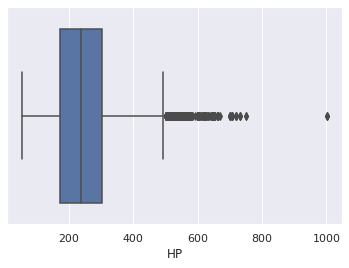

In [44]:
sean.boxplot(x=var["HP"])

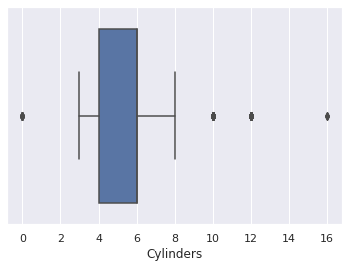

In [46]:
sean.boxplot(x=var["Cylinders"])

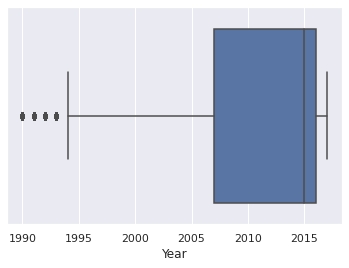

In [42]:
 sean.boxplot(x=var["Year"])

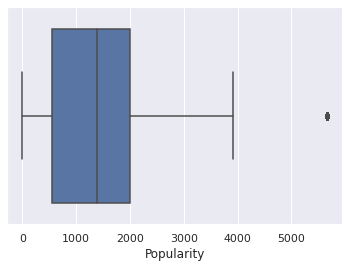

In [47]:
sean.boxplot(x=var["Popularity"])

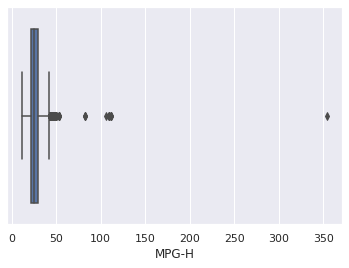

In [48]:
sean.boxplot(x=var["MPG-H"])

In [52]:
q1Value=0.25
q2Value=0.75
q1 = var.quantile(q1Value)
q2 = var.quantile(q2Value)
IQR = q2 - q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [54]:
#Check number of outliers in boxplot of different columns before removing them
( (var<(q1-(1.5*IQR))) | (var>(q2+(1.5*IQR))) ).sum()

Cylinders        309
Drive Mode         0
HP               495
MPG-C            248
MPG-H            129
Make               0
Model              0
Popularity       811
Price            941
Transmission       0
Vehicle Size       0
Vehicle Style      0
Year             465
dtype: int64

In [55]:
var=var[~( (var<(q1-(1.5*IQR))) | (var>(q2+(1.5*IQR))) ).any(axis=1)]

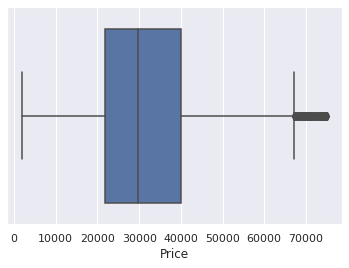

In [57]:
#Boxplot of different columns after removing the outliers
sean.boxplot(x=var["Price"])

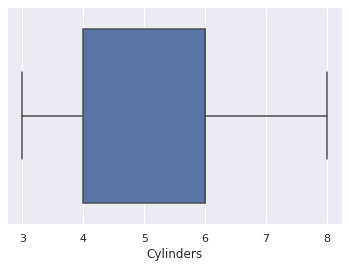

In [58]:
sean.boxplot(x=var["Cylinders"])

We can clearly see a difference between the graphs after removing outliers as the outliers aren't in the range anymore and won't make problems in drawing conclusions. At last we can check if there are any outliers left out. 

In [61]:
#Check number of outliers in boxplot of different columns after removing them
( (var<(q1-(1.5*IQR))) | (var>(q2+(1.5*IQR))) ).sum()

Cylinders        0
Drive Mode       0
HP               0
MPG-C            0
MPG-H            0
Make             0
Model            0
Popularity       0
Price            0
Transmission     0
Vehicle Size     0
Vehicle Style    0
Year             0
dtype: int64

# **6. What car brands are the most represented in the dataset and find the average price among the top car brands.**

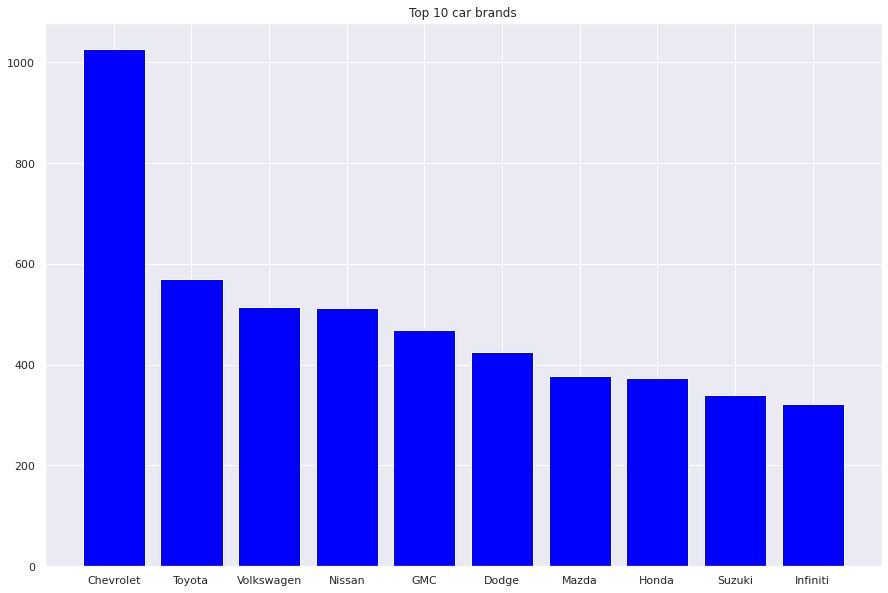

In [64]:
#Count numbers of top 10 cars per brand
count=var["Make"].value_counts()

#Top 10 car brands
topCars=counts.index[:10]

#Plot bar graph of top 10 cars brand
matplot.figure(figsize=(15,10))
matplot.bar(popularcars,height=counts[:10],color="Blue")
matplot.title("Top 10 car brands")
matplot.show()

In [66]:
#Average price among the top 10 car brands
prices=var[["Make","Price"]].loc[(var["Make"]=="Chervolet") | (var["Make"]=="Ford") | (var["Make"]=="Toyota") |
                                (var["Make"]=="Nissan") | (var["Make"]=="GMC") | (var["Make"]=="Dodge") | 
                                (var["Make"]=="Honda") | (var["Make"]=="Cadillac") | (var["Make"]=="Mazda") |
                                (var["Make"]=="Volkswagen")].groupby("Make").mean()
#Print average price of top 10 car brands
print (prices)

                   Price
Make                    
Cadillac    49831.070000
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# **7. Plot the correlation matrix and documents your insights**

# 7(a). Plotting correlation matrix.

In [68]:
#Correlation matrix
var.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


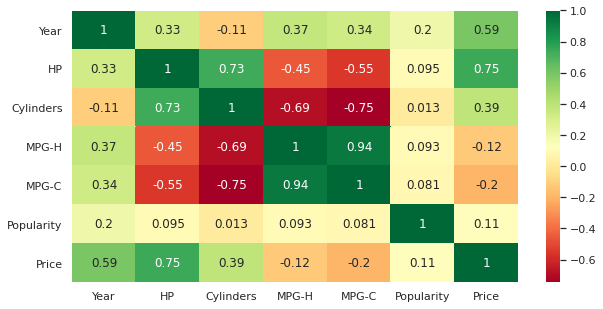

In [70]:
#Plot heatmap for different columns
matplot.figure(figsize=(10,5))
corrmatrix=var.corr()
sean.heatmap(corrmatrix,cmap="RdYlGn",annot=True)

# 7(b) = Documents your insights (Using heatmap plotted)

1) We conclude that HP and Cylinders both are correlated positively with each other

2) Price is correlated with Year and HP positively

3) MPG-C and MPG-H both have very less correlation in each other

4) MPG-C and MPG-H both have strong negitive correlation with Cylinders

5) Popularity is not correlated with anything

# **8. Perform EDA and plot different graphs and document your findings** 
(Also check how other variables affect the price of the car)

**8.1 Plotting graphs of different variables against price(Scatter Plot)**

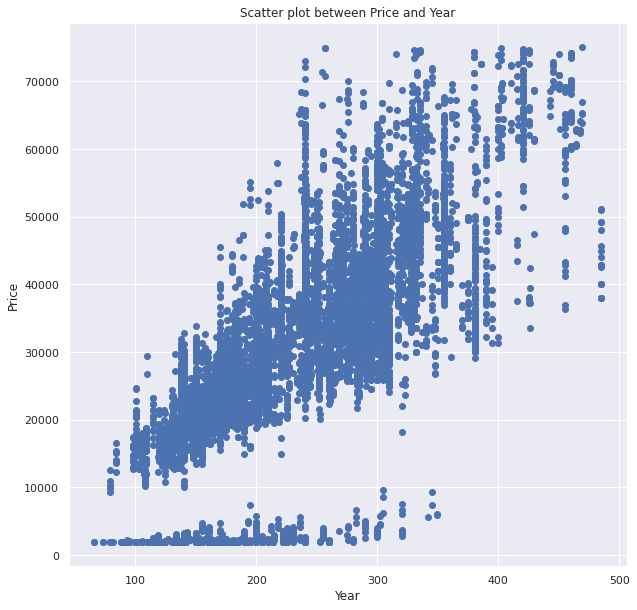

In [76]:
#Graph between Price and HP
fig, axis=matplot.subplots(figsize=(10,10))
axis.scatter(var["HP"], var["Price"])
matplot.title("Scatter plot between Price and Year")
axis.set_xlabel("Year")
axis.set_ylabel("Price")
matplot.show()


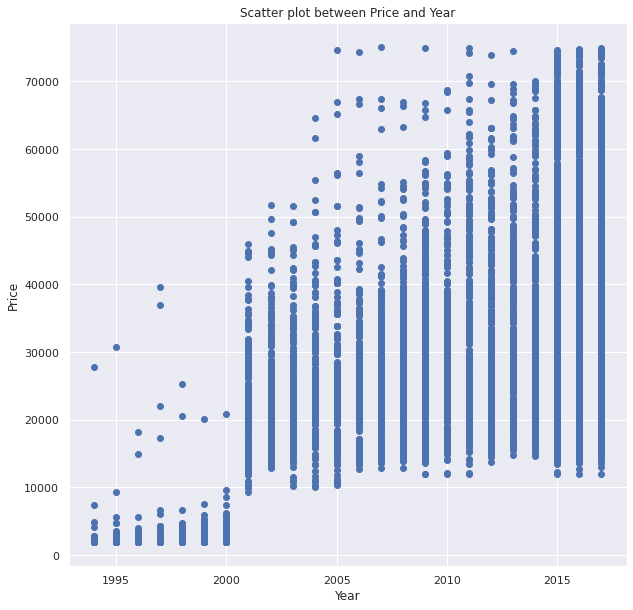

In [77]:
#Graph between Price and Year
fig, axis=matplot.subplots(figsize=(10,10))
axis.scatter(var["Year"], var["Price"])
matplot.title("Scatter plot between Price and Year")
axis.set_xlabel("Year")
axis.set_ylabel("Price")
matplot.show()



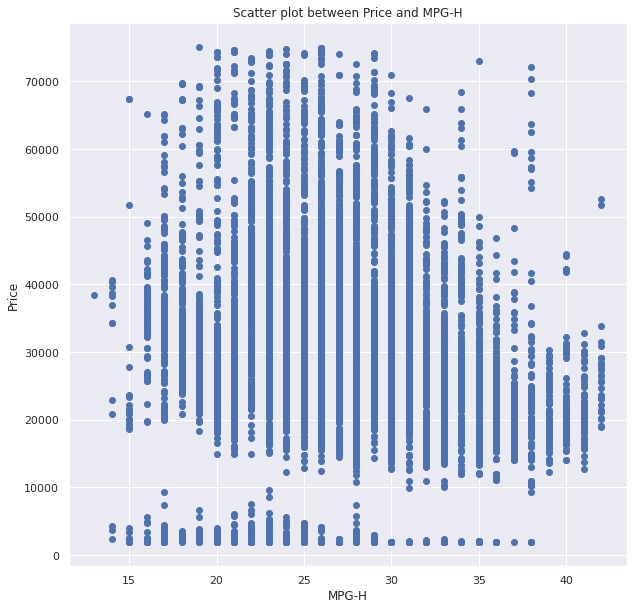

In [78]:
#Graph between Price and MPG-H
fig, axis=matplot.subplots(figsize=(10,10))
axis.scatter(var["MPG-H"], var["Price"])
matplot.title("Scatter plot between Price and MPG-H")
axis.set_xlabel("MPG-H")
axis.set_ylabel("Price")
matplot.show()


**8.2 Which cars sold the most ?**

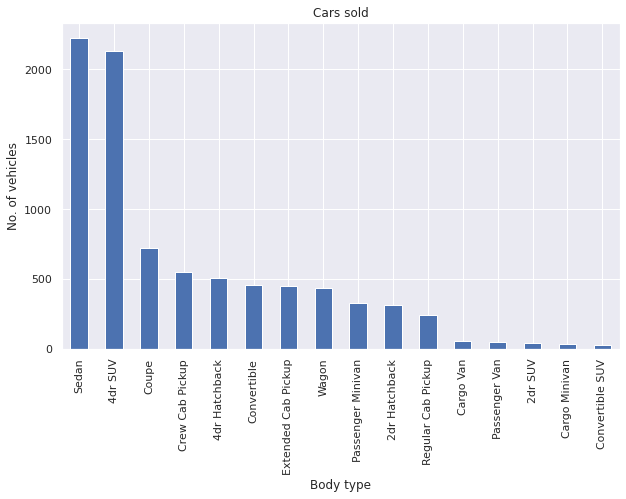

In [80]:
var['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))                      # Bar chart for car 'body' variable
plt.title("Cars sold")
plt.ylabel('No. of vehicles')
plt.xlabel('Body type');

**8(b) = Conclusion after plotting different graphs**

1) After plotting graph between Year and Price we conclude that as Year increase Price also increase

2) As value of HP insrease Price will also increase

3) Price will decrease with the value of MPG-H and MPG-C

4) Popularity is not effecting the Price

# **9. Split the dataset into 80 and 20 ratio and build a machine learning model with Price as the target variable**

In [81]:
x = var[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = var['Price'].values

In [82]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [83]:
#Splitting the dataset into the training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [84]:
#Fitting multiple linear regression to the training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

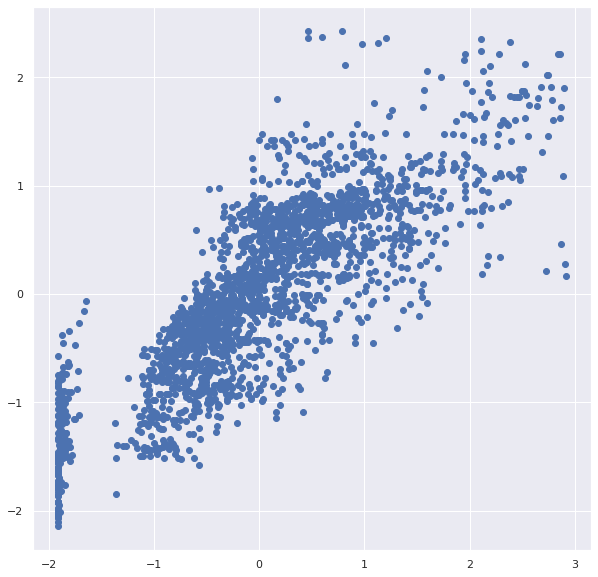

In [85]:
#Predicting the test set results
y_pred = regressor.predict(x_test)
matplot.figure(figsize=(10,10))
matplot.scatter(y_test,y_pred)

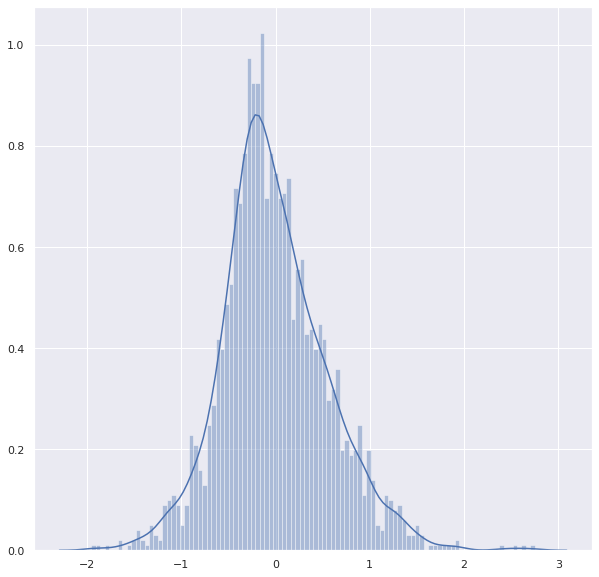

In [86]:
matplot.figure(figsize=(10,10))
sean.distplot((y_test-y_pred),bins=100)

In [87]:
#Finding the value of MAE, RMSE and R-Square
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4281701916358833
Root Mean Squared Error: 0.5559106680102438
R2 Score: 0.684894647677629


# **10. Perform different algorithms and check their performance over metrics like R-Square, RMSE, MAE**

**1.SVR**

In [88]:
#Insert SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

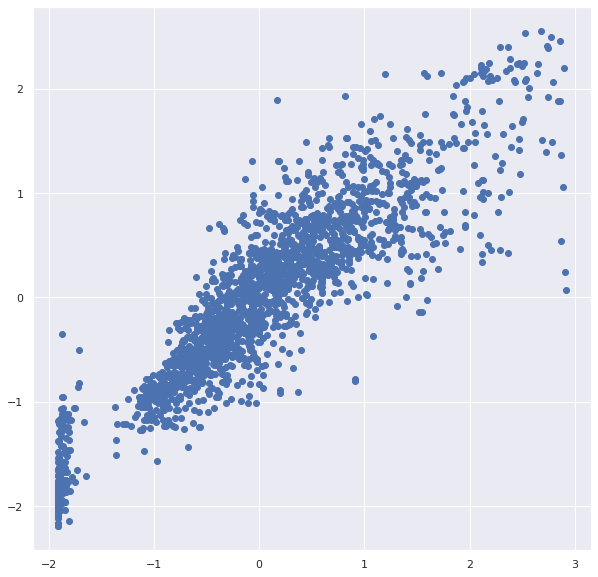

In [89]:
#Predicting a new result using SVR
y_pred = regressor.predict(x_test)
matplot.figure(figsize=(10,10))
matplot.scatter(y_test,y_pred)

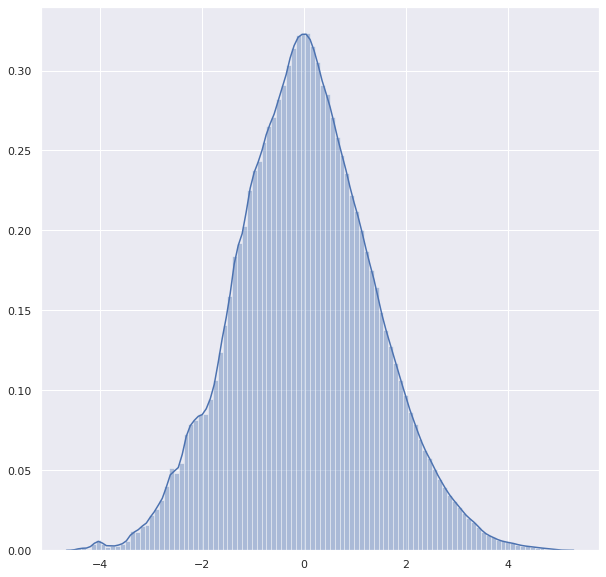

In [90]:
matplot.figure(figsize=(10,10))
sean.distplot((y_test-y_pred),bins=100)

In [91]:
#Find value MAE, RMSE and R-Square using SVR
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2989164615374874
Root Mean Squared Error: 0.4269789356908808
R2 Score: 0.8141088713895863


**2. Random Forest Regression**

In [92]:
#Input Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

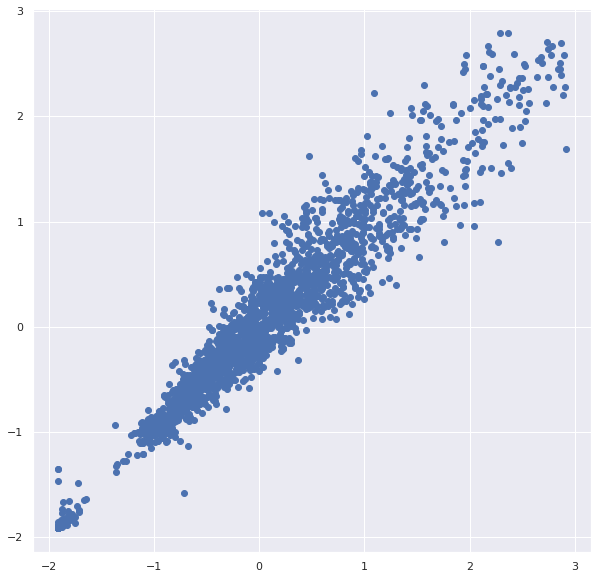

In [93]:
#Predict result using Random Forest Regression
y_pred = regressor.predict(x_test)
matplot.figure(figsize=(10,10))
matplot.scatter(y_test,y_pred)

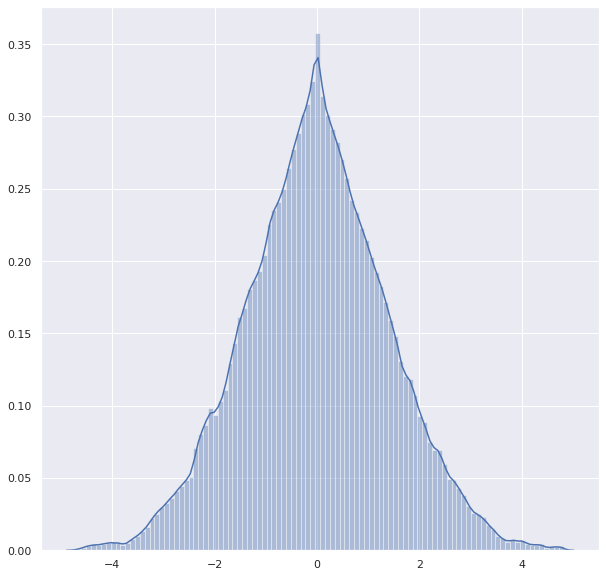

In [94]:
matplot.figure(figsize=(10,10))
sean.distplot((y_test-y_pred),bins=100)

In [95]:
#Find values of MAE, RMSE and R-Square for Random Forest Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.1822860862479563
Root Mean Squared Error: 0.25523191570998166
R2 Score: 0.9335774225479623


 **3. Polynomial Regression**

In [96]:
#Input polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

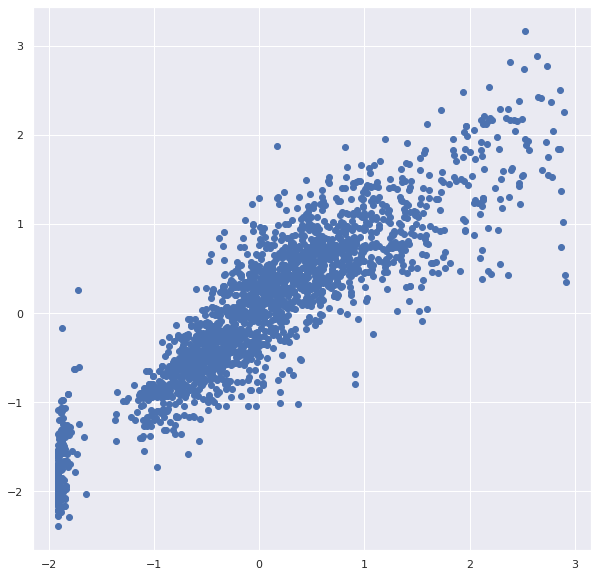

In [97]:
#Predicting a new result using polynomial regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x_test))
matplot.figure(figsize=(10,10))
matplot.scatter(y_test,y_pred)

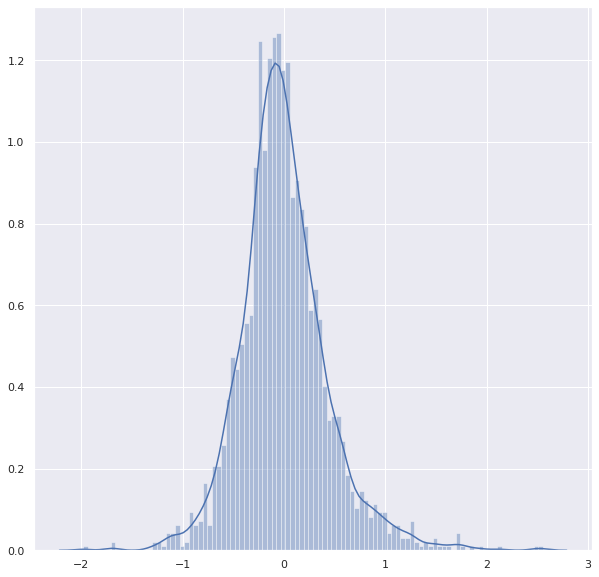

In [98]:
matplot.figure(figsize=(10,10))
sean.distplot((y_test-y_pred),bins=100)


In [99]:
#Finding the value of MAE, RMSE and R-Square
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31579846344881884
Root Mean Squared Error: 0.4333712586579144
R2 Score: 0.8085012364392028
